# 第5回課題

In [23]:
import math
import matplotlib.pyplot as plt


# kadai 1
Eps = 1e-4
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_inverse(y,a,b):
    m = (a + b)/2.0
    fx = sigmoid(m)
    if abs(fx - y) < Eps:
        return m
    elif fx > y:
        return sigmoid_inverse(y, a, m)
    else:
        return sigmoid_inverse(y, m, b)

    
    
#kadai 2
a=[1,3,5,7]
b=[0,1,10,100,1000]

def binary_search(a, x, l, r):
    m = (l + r) // 2
    if l + 1 == r:
        if a[l] == x:
            return l
        else:
            return -1
    elif l + 1 < r and a[m] > x:
        return binary_search(a, x, l, m)
    else:
        return binary_search(a, x, m, r)


    
#kadai 4
def merge(a, b):
    c=[]
    i,j = 0,0
    while i<len(a) and j<len(b):
        if a[i] < b[j]: 
            c.append(a[i])
            i+=1 
        else:
            c.append(b[j])
            j+=1 
            # ループ不変条件: a[0:i]とb[0:j]は昇順にcに詰まっている
    c += a[i:] # a[i] 以降の a の要素を全て c に詰める
    c += b[j:]
    return c

def mergesort(a):
    if len(a) <= 1:
        return a
    
    left = mergesort(a[:(len(a)+1)//2])
    right = mergesort(a[(len(a)+1)//2:])

    
    return merge(left, right)

    

import unittest

class TestKadai(unittest.TestCase):
    
    def test_sigmoid_inverse(self):
        self.assertAlmostEqual(0,0, sigmoid_inverse(0.5,-10,10), delta = Eps)
        self.assertAlmostEqual(-1.3867, sigmoid_inverse(0.2,-10,10), delta = Eps)
        
    def test_binary_search(self):
        self.assertEqual(0, binary_search(a, 1, 0, len(a)))
        self.assertEqual(1, binary_search(a, 3, 0, len(a)))
        self.assertEqual(2, binary_search(a, 5, 0, len(a)))
        self.assertEqual(3, binary_search(a, 7, 0, len(a)))
        self.assertEqual(-1, binary_search(a, 2, 0, len(a)))
        self.assertEqual(1, binary_search(b, 1, 0, len(a)))
        
    def test_(self):
        self.assertEqual([1,2,3,4,5,6,7,8,9], mergesort([8,3,4,1,5,9,6,7,2]))

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    

...
----------------------------------------------------------------------
Ran 3 tests in 0.006s

OK


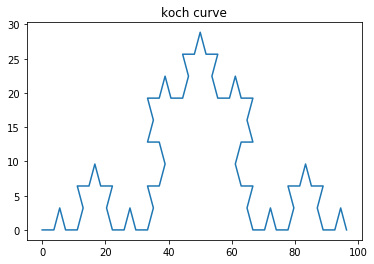

In [21]:
#kadai 3
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_koch(a):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    a_ = np.array(a)
    xlist = a_[:, 0]
    ylist = a_[:, 1]
    ax.plot(xlist, ylist)
    ax.set_title("koch curve")

def koch(x0,y0, x1,y1, n): 
    if n==0:
        return [[x0,y0]] # (x0,y0)..(x1,y1)の直線
    else:
        # 変数の準備
        dx = x1 - x0
        dy = y1 - y0
        sx = x0 + dx / 3.0 
        sy = y0 + dy / 3.0
        ux = x0 + dx / 2.0 - math.sqrt(3)*dy / 6.0 
        uy = y0 + dy / 2.0 + math.sqrt(3)*dx / 6.0
        tx = x0 + dx * (2.0 / 3.0)
        ty = y0 + dy * (2.0 / 3.0)
        # 再帰 ... 部分は適当に埋める
        return koch(x0,y0, sx, sy, n-1) + koch(sx, sy, ux, uy, n-1) + koch(ux, uy, tx, ty, n-1) + koch(tx, ty, x1, y1, n-1)

    
# n0 = koch(0,0,100,0,0)
# n1 = koch(0,0,100,0,1)
# n2 = koch(0,0,100,0,2)
n3 = koch(0,0,100,0,3)

# plot_koch(n0)
# plot_koch(n1)
# plot_koch(n2)
plot_koch(n3)